## Books in Italian or translated from Italian

In [1]:
from stcn import run_query, stcn_languages
import json
from collections import Counter
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import math

The query below creates a list of all the languages represented in the STCN. 

In [2]:
query = '''

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?language WHERE {
?title schema:mainEntityOfPage ?mainEntity .
?mainEntity schema:isPartOf <http://data.bibliotheken.nl/id/dataset/stcn>  . 

?title schema:inLanguage ?language .
} 

'''

df = run_query(query)
count_languages = Counter(df['language.value'])

for language,count in count_languages.most_common():
    print(f'{language} ({stcn_languages[language]}): {count} title',end='')
    if count>1:
        print('s',end='')
    print('.')


nl (Dutch; Flemish): 143753 titles.
la (Latin): 49022 titles.
fr (French): 23635 titles.
de (German): 1354 titles.
en (English): 1299 titles.
he (Hebrew): 973 titles.
grc (Greek, Ancient (to 1453)): 866 titles.
it (Italian): 578 titles.
mis (Uncoded languages): 391 titles.
es (Spanish; Castilian): 340 titles.
mul (Multiple languages): 266 titles.
nds (Low German; Low Saxon; German, Low; Saxon, Low): 198 titles.
yi (Yiddish): 149 titles.
arc (Official Aramaic (700-300 BCE); Imperial Aramaic (700-300 BCE)): 144 titles.
pt (Portuguese): 128 titles.
ar (Arabic): 96 titles.
fy (Western Frisian): 53 titles.
ms (Malay): 53 titles.
hu (Hungarian): 27 titles.
si (Sinhala; Sinhalese): 21 titles.
syr (Syriac): 17 titles.
ta (Tamil): 17 titles.
hy (Armenian): 16 titles.
lad (Ladino): 12 titles.
gez (Geez): 11 titles.
ru (Russian): 10 titles.
pl (Polish): 8 titles.
peo (Persian, Old (ca.600-400 B.C.)): 7 titles.
ang (English, Old (ca.450-1100)): 7 titles.
crp (Creoles and pidgins ): 7 titles.
dum (

The following query requests all the titles in Italian (language code 'it').

In [3]:
language_code = 'it'

query = '''

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT * WHERE {
?title schema:mainEntityOfPage ?mainEntity .
?mainEntity schema:isPartOf <http://data.bibliotheken.nl/id/dataset/stcn>  . 

?title schema:inLanguage \''''+language_code+'''\' .

} 

'''
print(query)

df = run_query(query)
nr_titles = df.drop_duplicates(subset="title.value", keep="last").shape[0]





PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT * WHERE {
?title schema:mainEntityOfPage ?mainEntity .
?mainEntity schema:isPartOf <http://data.bibliotheken.nl/id/dataset/stcn>  . 

?title schema:inLanguage 'it' .

} 




In [4]:
print( f'The STCN has {nr_titles} titles containing texts in {stcn_languages[language_code]}.')

The STCN has 578 titles containing texts in Italian.


## Titles in Italian

For each of these titles, we collect data about the following aspects:

* title
* author
* publisher
* place of publication
* year of publication
* subject

In [5]:
query = '''

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT * WHERE {

?resource schema:mainEntityOfPage ?mainEntity .
?mainEntity schema:isPartOf <http://data.bibliotheken.nl/id/dataset/stcn>  . 

?resource schema:inLanguage \''''+language_code+'''\' .
?resource schema:publication ?publ .

?resource schema:name ?title . 

OPTIONAL {
?resource schema:alternateName ?alt_title . }

OPTIONAL {
?resource schema:author ?author_node . 
?author_node schema:author ?author_info .
?author_info  rdfs:label ?author_name . }

OPTIONAL {
?resource schema:inLanguage ?language . }


OPTIONAL {
?publ schema:startDate ?publ_year . 
?publ schema:description ?imprint . 
?publ schema:publishedBy ?publisher . 
?publisher schema:name ?publ_name .
?publisher schema:location ?location_node .
?location_node schema:address ?address .
?address schema:addressLocality ?place . 
}

OPTIONAL { 
?resource schema:about ?subject .
?subject skos:prefLabel ?subject_label .
} 


}

'''


print(query)



PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT * WHERE {

?resource schema:mainEntityOfPage ?mainEntity .
?mainEntity schema:isPartOf <http://data.bibliotheken.nl/id/dataset/stcn>  . 

?resource schema:inLanguage 'it' .
?resource schema:publication ?publ .

?resource schema:name ?title . 

OPTIONAL {
?resource schema:alternateName ?alt_title . }

OPTIONAL {
?resource schema:author ?author_node . 
?author_node schema:author ?author_info .
?author_info  rdfs:label ?author_name . }

OPTIONAL {
?resource schema:inLanguage ?language . }


OPTIONAL {
?publ schema:startDate ?publ_year . 
?publ schema:description ?imprint . 
?publ schema:publishedBy ?publisher . 
?publisher schema:name ?publ_name .
?publisher schema:location ?location_node .
?location_node schema:address ?address .
?address sc

In [6]:
df = run_query(query)
print(df.shape)

(2456, 36)


The cell below print information that was requested about the first twenty titles.

In [7]:
for i,row in df.drop_duplicates(subset='resource.value', keep="first").sort_values(by='publ_year.value').iloc[:20].iterrows():
    print(f"{row['resource.value']}\nTitle: {row['title.value']}\nPlace of publication: {row['place.value']}\nYear: {row['publ_year.value']}\n")

http://data.bibliotheken.nl/id/nbt/p427507464
Title: Dictionaire, colloqves ov dialogves en qvatre langves flamen, françois, español, & italien [...].
Place of publication: Gent
Year: 1568

http://data.bibliotheken.nl/id/nbt/p424370913
Title: Exercitatio alphabetica nova et utilissima, variis expressa lingvis et characteribvs.
Place of publication: Antwerpen
Year: 1569

http://data.bibliotheken.nl/id/nbt/p427507502
Title: Dictionaire, colloqves ov dialogves en qvatre langves flamen, françois, espaignol, & italien [...].
Place of publication: Antwerpen
Year: 1573

http://data.bibliotheken.nl/id/nbt/p409609145
Title: Colloqves ov dialogves avec vn dictionaire en six langues: flamen, anglois, alleman, françois, espaignol, & italien [...].
Place of publication: Antwerpen
Year: 1576

http://data.bibliotheken.nl/id/nbt/p427502519
Title: Dictionariolvm hexaglosson cum colloquijs aliquot sex linguarum Latinè, Germanicè, Belgicè, Gallicè, Hispanicè, Italicè.
Place of publication: Antw

## Create JSON

To make the analysis easier, the metadata are converted to JSON. 

In [8]:
def year_publication(year_str):
    if re.search( r'\d{4}' , str(year_str) ):
        return int(year_str)
    else:
        return np.nan
    
df['year'] = df['publ_year.value'].apply(year_publication)


unique_ids = df.sort_values('year')['resource.value'].unique()

data = []

def print_value(value):
    if pd.isna(value):
        return ''
    else:
        return value
    
def get_values(df,field,fields_dict):
    rows = df.drop_duplicates(field)
    all_rows = []
    for i,row in rows.iterrows():
        values = dict()
        for f in fields_dict:
            values[fields_dict[f]] = print_value(row[f])
        all_rows.append(values)
    return all_rows    

for resource in unique_ids:

    record = dict()
    record['ppn'] = resource
    #print(resource)

    df_resource = df[ df['resource.value'] == resource ]
    
    record['title'] = df_resource.iloc[0]['title.value']
    record['alternative_title'] = df_resource.iloc[0]['alt_title.value']
    record['year'] = df_resource.iloc[0]['publ_year.value']
    
    ## Publishers
    unique_id = 'publisher.value'
    fields_dict = { 'publisher.value':'ppn',
        'publ_name.value':'name'
        #'place.value':'place'
    }
    
    all_publishers = get_values(df_resource,unique_id,fields_dict)
    record['publishers'] = all_publishers

    ## Subjects
    unique_id = 'subject.value'
    fields_dict = {'subject.value':'ppn',
              'subject_label.value':'label'}
    all_subjects = get_values(df_resource,unique_id,fields_dict)
    record['subjects'] = all_subjects
    
    ## Authors
    unique_id = 'author_info.value'
    fields_dict = {'author_info.value':'ppn',
              'author_name.value':'name' }
    all_authors = get_values(df_resource,unique_id,fields_dict)
    record['authors'] = all_authors
    
    ## Languages
    unique_id = 'language.value'
    fields_dict = {'language.value':'code' }
    all_languages = get_values(df_resource,unique_id,fields_dict)
    record['languages'] = all_languages
    
    data.append(record)
    
with open('stcn_data.json','w',encoding='utf-8') as out:
    out.write(json.dumps(data,indent=4))
    
f = open('stcn_data.json')
json_data = json.load(f)
f.close()

## Total number of books per year

We can then begin to analyse the collection of titles. In which years have these books been published?

In [9]:
years = Counter()
invalid = []

for book in json_data:
    if re.search(r'\d{4}',str(book['year'])):
        years.update([book['year']])
    else:
        invalid.append(book['year'])

             
for year in set(invalid):
    print(f"\'{year}\' is not a valid year.")

'nan' is not a valid year.
'16XX' is not a valid year.
'173X' is not a valid year.
'178X' is not a valid year.
'17XX' is not a valid year.
'171X' is not a valid year.
'179X' is not a valid year.
'176X' is not a valid year.
'174X' is not a valid year.
'177X' is not a valid year.
'168X' is not a valid year.
'15XX' is not a valid year.
'165X' is not a valid year.
'170X' is not a valid year.
'175X' is not a valid year.
'172X' is not a valid year.
'166X' is not a valid year.


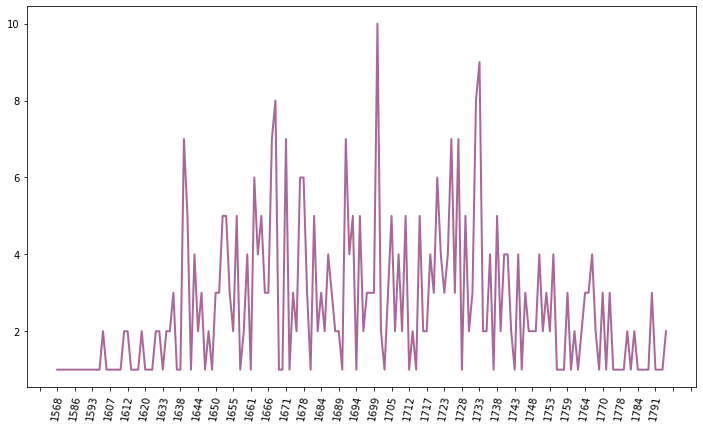

In [10]:
x_axis = list(years.keys())
y_axis = list(years.values())

fig = plt.figure( figsize = ( 12, 7))
ax = sns.lineplot( x= x_axis, y= y_axis, 
                  color= '#AA6799', linestyle='solid',linewidth=2 )

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.xticks(rotation= 80)
plt.show()

## Subjects

In [11]:
def singular_plural(noun,number):
    if number>1:
        return noun+'s'
    else:
        return noun


subjects = Counter()

for book in json_data:
        subject_desc = ''
        for subject in book['subjects']:
            if re.search( r'\w+' , subject['label'] ):
                subjects.update([subject['label']])

        
for s,i in subjects.most_common():
    print(f"{s}: {i} " + singular_plural('title',i) )

Dramaturgy and Musicology: 166 titles
Italian language and literature: 162 titles
French language and literature: 40 titles
History (Italy): 40 titles
Art forms: 24 titles
History (Europe): 22 titles
Languages (general): 21 titles
History (Netherlands): 20 titles
Theology (church history): 19 titles
Dutch language and literature: 16 titles
History (general): 16 titles
Political science: 15 titles
Latin language and literature: 14 titles
History (France): 14 titles
Theology (practical): 12 titles
History (antiquity): 11 titles
Spanish language and literature: 9 titles
History (Spain, Portugal): 9 titles
History (Great Britain and Ireland): 9 titles
German language and literature: 9 titles
Civil engineering: 8 titles
History (Germany, Central Europe): 8 titles
Public and social administration: 7 titles
Law: 6 titles
General works: 6 titles
Theology (Christian doctrine): 6 titles
Documentary information: 5 titles
Philosophy: 5 titles
Education: 4 titles
Medicine: 4 titles
Theology (Bible 

## Publishers

Which publishers are responsible for these books?

In [12]:
publishers = Counter()

for book in json_data:
        publ_name = ''
        for publ in book['publishers']:
            publ_name += publ['name'] + '; '
            
        publ_name = re.sub(r';\s+$','',publ_name)
        if re.search(r'\w+',publ_name):
            publishers.update([publ_name])

        
for p,i in publishers.most_common():
    print(f"{p}: {i} " + singular_plural('title',i))

s.n.: 63 titles
Le Cène, Michel Charles: 50 titles
Roger, Etienne: 36 titles
Witvogel, Gerard Fredrik: 18 titles
Mortier, Pieter (I): 10 titles
Elzevier, Abraham (I); Elzevier, Bonaventura: 9 titles
Marteau, Pierre: 8 titles
Gallet, George: 7 titles
s.n.; Pitteri, Francesco: 7 titles
Olofsen, Arnoldus: 7 titles
Hummel, Jean Julien: 7 titles
Elzevier, Daniel; Elzevier, Lowijs (III): 6 titles
La Feuille, Daniel de: 6 titles
Brunel, Pierre: 6 titles
s.n.; s.n.: 6 titles
Pitteri, Francesco; s.n.: 6 titles
Elzevier, Bonaventura; Elzevier, Abraham (I): 5 titles
Elzevier, Daniel: 5 titles
Elzevier, Daniel; s.n.: 5 titles
Geremia, Angelo; s.n.: 5 titles
Hovius, Henricus: 4 titles
Raphelengius, Franciscus (II): 4 titles
s.n.; Elzevier, Daniel: 4 titles
Janssonius van Waesberge, Gillis; Janssonius van Waesberge, Johannes (II): 4 titles
s.n.; Geremia, Angelo: 4 titles
Blaeu, Willem Jansz: 3 titles
s.n.; Elzevier, Abraham (I); Elzevier, Bonaventura: 3 titles
Janssonius, Johannes: 3 titles
Last, C

## Authors

In [13]:
authors = Counter()

for book in json_data:
        author_name = ''
        for author in book['authors']:
            if re.search(r'\w+',author['name']):
                authors.update([author['name']])

for a,i in authors.most_common():
    print(f"{a}: {i} " + singular_plural('title',i))

Leti, G. (1630-1701): 39 titles
Corelli, Arcangelo (1653-1713): 36 titles
Guarini, Giovanni Battista (1538-1612): 14 titles
Boccalini, Traiano (1556-1613): 13 titles
Pallavicino, Ferrante (1615-1644): 12 titles
Vigneron, Jean (1642-1708): 12 titles
Locatelli, Pietro (1695-1764): 10 titles
Bentivoglio, Guido (1579-1644): 9 titles
Duez, Nathanaël (1609-c.1670): 9 titles
Fagiuoli, Giovanni Battista (1660-1742): 9 titles
Tasso, Torquato (1544-1595): 8 titles
Boccaccio, Giovanni (1313/14-1375): 8 titles
Rosa, Salvator (1615-1673): 8 titles
Geminiani, Francesco (1687-1762): 8 titles
Vignola, Giacomo Barozzi da (1507-1573 ; Ital. architect, schilder, architect.-theoreticus): 6 titles
Garnier, Philippe (-ca.1655): 6 titles
Albinoni, Tomaso (1671-1751): 6 titles
Hurlebusch, Conrad Friedrich (1691-1765): 6 titles
Marino, Giovanni Battista (1569-1625): 5 titles
Tartini, Giuseppe (1692-1770): 5 titles
Mahaut, Antoine (ca. 1720-ca. 1785): 5 titles
Beccaria, Cesare (1738-1794): 5 titles
Aretino, Pie

## Translations

In [14]:
query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX kb: <http://data.bibliotheken.nl/def#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>

SELECT * WHERE {

?resource schema:mainEntityOfPage ?mainEntity .
?mainEntity schema:isPartOf <http://data.bibliotheken.nl/id/dataset/stcn>  . 

?resource schema:translationOfWork ?trans .
?trans schema:inLanguage 'it' .

}
"""
df = run_query(query)
df.shape

(861, 6)

In [17]:
for i,row in df.drop_duplicates(subset='resource.value', keep="first").iloc[:20].iterrows():
    print(f"{row['resource.value']}\n")

http://data.bibliotheken.nl/id/nbt/p822794179

http://data.bibliotheken.nl/id/nbt/p822873818

http://data.bibliotheken.nl/id/nbt/p830776540

http://data.bibliotheken.nl/id/nbt/p830930582

http://data.bibliotheken.nl/id/nbt/p831089032

http://data.bibliotheken.nl/id/nbt/p831253606

http://data.bibliotheken.nl/id/nbt/p831277335

http://data.bibliotheken.nl/id/nbt/p831372532

http://data.bibliotheken.nl/id/nbt/p832096911

http://data.bibliotheken.nl/id/nbt/p832453501

http://data.bibliotheken.nl/id/nbt/p832456314

http://data.bibliotheken.nl/id/nbt/p832727946

http://data.bibliotheken.nl/id/nbt/p832912816

http://data.bibliotheken.nl/id/nbt/p832913820

http://data.bibliotheken.nl/id/nbt/p832913928

http://data.bibliotheken.nl/id/nbt/p832925586

http://data.bibliotheken.nl/id/nbt/p833173103

http://data.bibliotheken.nl/id/nbt/p833190431

http://data.bibliotheken.nl/id/nbt/p833254901

http://data.bibliotheken.nl/id/nbt/p833254960

